In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 46.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
!pip install arch

     |████████████████████████████████| 902 kB 25.3 MB/s 
     |████████████████████████████████| 9.8 MB 52.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
from arch import arch_model

# **ARCH**

In [8]:
asset='SPY'
start_date='2015-01-01'
end_date='2018-12-31'

In [12]:
df=yf.download(asset,start=start_date,end=end_date,adjusted=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.976227,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.707886,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,176.034058,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,178.227600,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,181.390289,147217800


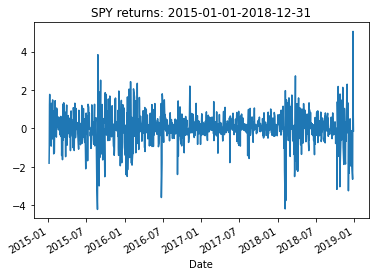

In [13]:
returns=100*df['Adj Close'].pct_change().dropna()
returns.name='asset_rtn'
returns.plot(title=f'{asset} returns: {start_date}-{end_date}')


In [14]:
model=arch_model(returns,mean='Zero',vol='ARCH',p=1,o=0,q=0)

In [15]:
model_fitted=model.fit(disp='off')

In [17]:
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:              asset_rtn   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1199.09
Distribution:                  Normal   AIC:                           2402.18
Method:            Maximum Likelihood   BIC:                           2412.00
                                        No. Observations:                 1004
Date:                Sat, Nov 20 2021   Df Residuals:                     1004
Time:                        11:37:41   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4662  4.091e-02     11.395  4.404e-30 [  0.386,  0.54

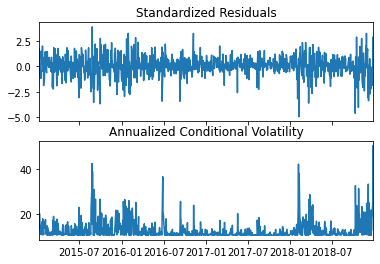

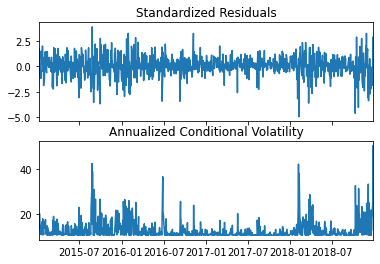

In [18]:
model_fitted.plot(annualize='D')

# **GARCH**

In [19]:
model2=arch_model(returns,mean='Zero',vol='GARCH',p=1,o=0,q=1)

In [22]:
model2_fitted=model2.fit(disp='off')
print(model2_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              asset_rtn   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1115.37
Distribution:                  Normal   AIC:                           2236.73
Method:            Maximum Likelihood   BIC:                           2251.47
                                        No. Observations:                 1004
Date:                Sat, Nov 20 2021   Df Residuals:                     1004
Time:                        11:51:08   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0409  1.536e-02      2.666  7.687e-03 [1.

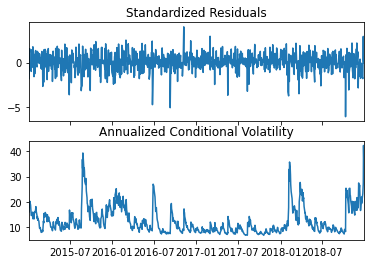

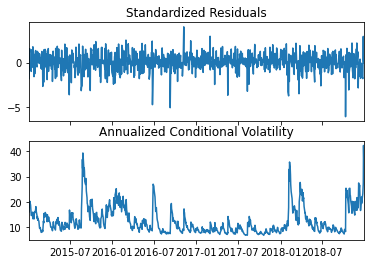

In [24]:
model2_fitted.plot(annualize='D')

# **CCG-GARCH**

In [38]:
etfs=['VTI','TLT','IEI','GLD','GSG']
n=len(etfs)
start_date='2015-01-01'
end_date='2018-12-31'

In [39]:
df=yf.download(etfs,start=start_date,end=end_date,adjusted=True)
df.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                         ...  Volume                   
                   GLD        GSG         IEI  ...     IEI       TLT      VTI
Date                                           ...                           
2015-01-02  114.080002  21.219999  111.022972  ...  820800   9432000  5298300
2015-01-05  115.800003  20.620001  111.276627  ...  236100   9789500  5383500
2015-01-06  117.120003  20.280001  111.620766  ...  347600  18331300  4226100
2015-01-07  116.430000  20.219999  111.720383  ...  329600   9762900  3661500
2015-01-08  115.940002  20.290001  111.584549  ...  217100   8055300  2796200

[5 rows x 30 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b5cbe84d0>,
      dtype=object)

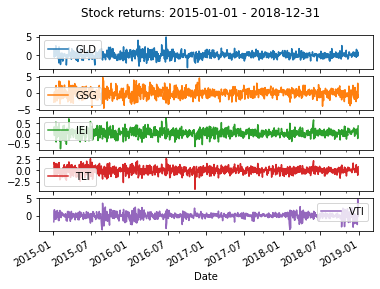

In [40]:
returns=100*df['Adj Close'].pct_change().dropna()
returns.plot(subplots=True,title=f'Stock returns: {start_date} - {end_date}')

In [41]:
coeffs=[]
cond_vol=[]
std_resids=[]
models=[]

In [42]:
for asset in returns.columns:
    # specify and fit the model
    model = arch_model(returns[asset], mean='Constant', 
                       vol='GARCH', p=1, o=0, q=1).fit(update_freq=0, 
                                                       disp='off');
    # store results in the lists 
    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility)
    std_resids.append(model.resid / model.conditional_volatility)
    models.append(model)

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03299. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [43]:
coeffs_df=pd.DataFrame(coeffs,index=returns.columns)
coeffs_df

,mu,omega,alpha[1],beta[1]
GLD,0.004362,0.002058,0.015717,0.979873
GSG,-0.005027,0.017822,0.035758,0.952358
IEI,0.003514,0.000602,0.044992,0.936445
TLT,-0.008412,0.001972,0.008115,0.986902
VTI,0.073701,0.039487,0.192926,0.760152


In [44]:
cond_vol_df = pd.DataFrame(cond_vol).transpose() \
                                    .set_axis(returns.columns, 
                                              axis='columns', 
                                              inplace=False)
cond_vol_df

,GLD,GSG,IEI,TLT,VTI
Date,,,,,
2015-01-05,1.130959,1.758196,0.270783,1.132355,1.007640
2015-01-06,1.136180,1.801850,0.267473,1.134744,1.196174
2015-01-07,1.134570,1.790653,0.267960,1.139886,1.158128
2015-01-08,1.126470,1.753432,0.261097,1.133395,1.140551
2015-01-09,1.117271,1.717638,0.255235,1.133041,1.256791
...,...,...,...,...,...
2018-12-21,0.619548,1.436688,0.148412,0.591969,1.404467
2018-12-24,0.617431,1.426142,0.146478,0.589755,1.571888
2018-12-26,0.627935,1.434501,0.150731,0.589322,1.787579


In [46]:
std_resids_df = pd.DataFrame(std_resids).transpose() \
                                        .set_axis(returns.columns, 
                                                  axis='columns', 
                                                  inplace=False)

std_resids_df.head()

,GLD,GSG,IEI,TLT,VTI
Date,,,,,
2015-01-05,1.329273,-1.605332,0.830762,1.394655,-1.778409
2015-01-06,0.999432,-0.912317,1.143107,1.595187,-0.880728
2015-01-07,-0.523109,-0.162420,0.319943,-0.165851,0.966678
2015-01-08,-0.377474,0.200308,-0.479124,-1.161025,1.481971
2015-01-09,1.015114,-0.628338,1.131141,0.974104,-0.718264


In [51]:
R = std_resids_df.transpose() \
                 .dot(std_resids_df) \
                 .div(len(std_resids_df))

In [53]:
diag=[]
D=np.zeros((n,n))
for j in models:
    diag.append(model.forecast(horizon=1).variance.values[-1][0])
diag=np.sqrt(np.array(diag))
np.fill_diagonal(D,diag)


H=np.matmul(np.matmul(D,R.values),D)
H

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


array([[ 4.09114413,  0.59820352,  1.75737053,  1.43834375, -0.48772748],
       [ 0.59820352,  4.11518888, -0.64579625, -0.81688079,  1.3312778 ],
       [ 1.75737053, -0.64579625,  4.09251528,  3.4353651 , -1.3621494 ],
       [ 1.43834375, -0.81688079,  3.4353651 ,  4.07491777, -1.26429035],
       [-0.48772748,  1.3312778 , -1.3621494 , -1.26429035,  4.11331464]])